## Pre Processing Data

In [214]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [215]:
DATA_PATH ="../data/spotify_songs.csv"
OUTPUT_PATH="../data/processed_spotify_songs.csv"

In [216]:
df = pd.read_csv(DATA_PATH)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [217]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [218]:
df.isna().sum()

nan_rows = df[df.isna().any(axis=1)]

print(nan_rows)


                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ... key  \
8151              HIP

### Choose to drop this 5 rows ?

In [219]:
df = df.dropna()

### Look for duplicate

We remove around 4500 rows of duplicates !

NB: Some duplicates are the same song just from different playlist, however sometimes it just has a different genre, so we may need to check how to handle this

In [220]:
df = df.drop_duplicates(subset=['track_id'], keep="last")

print(f"Len DF {len(df)}")

Len DF 28352


In [221]:
### Drop all useless columns
df = df.drop(
    ["track_id", "track_album_id", "playlist_id", "track_name", "track_album_name","playlist_name"],
    axis=1,
)

### Normalize data

In [222]:
scaler = MinMaxScaler()

columns_to_normalize = ["key", "loudness"]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000
mean,39.335320,0.653375,0.698373,0.487947,0.830422,0.565533,0.107939,0.177192,0.091129,0.190955,0.510386,120.958219,226574.631102
std,23.699443,0.145791,0.183508,0.328522,0.063626,0.495696,0.102547,0.222814,0.232562,0.155888,0.234344,26.954502,61081.363704
min,0.000000,0.000000,0.000175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.561000,0.579000,0.181818,0.799148,0.000000,0.041000,0.014300,0.000000,0.092600,0.329000,99.972000,187741.250000
50%,42.000000,0.670000,0.722000,0.545455,0.842089,1.000000,0.062600,0.079700,0.000021,0.127000,0.512000,121.993500,216933.000000
75%,58.000000,0.760000,0.843000,0.818182,0.874615,1.000000,0.133000,0.260000,0.006573,0.249000,0.695000,133.999000,254975.250000
max,100.000000,0.983000,1.000000,1.000000,1.000000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [223]:
unique_values = df["playlist_genre"].unique()

# Display the unique values
print(unique_values)

['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']


### Some plots

Maybe we can standardize some features below

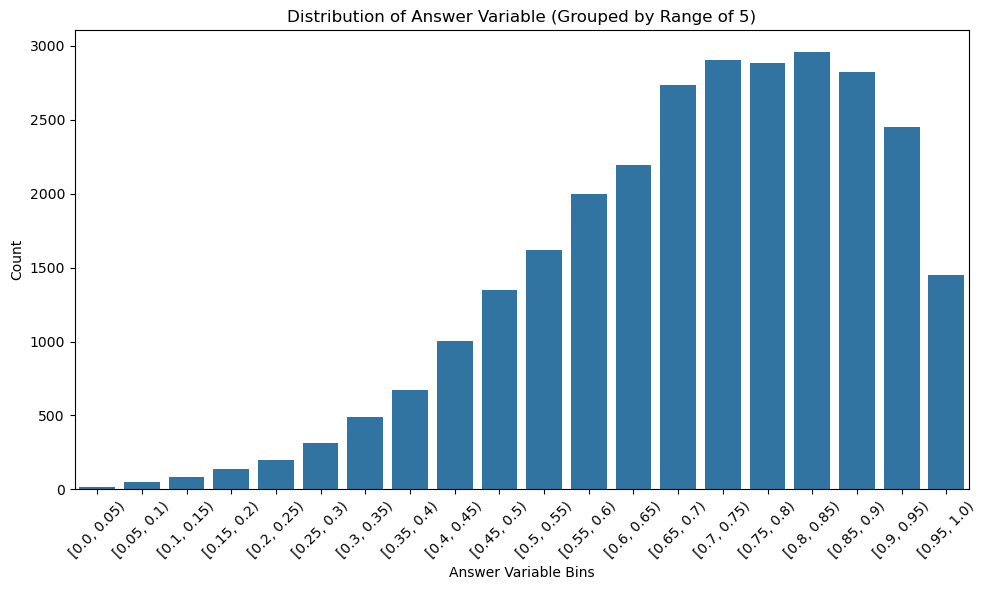

In [224]:
bins = [i / 20.0 for i in range(0, 21)]

# Create a new column 'binned_answer' with the binned data
df["binned_answer"] = pd.cut(df["energy"], bins=bins, right=False)

# Plot the distribution using countplot to show the counts for each bin
plt.figure(figsize=(10, 6))
sns.countplot(x="binned_answer", data=df)

# Customize the plot
plt.title("Distribution of Answer Variable (Grouped by Range of 5)")
plt.xlabel("Answer Variable Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

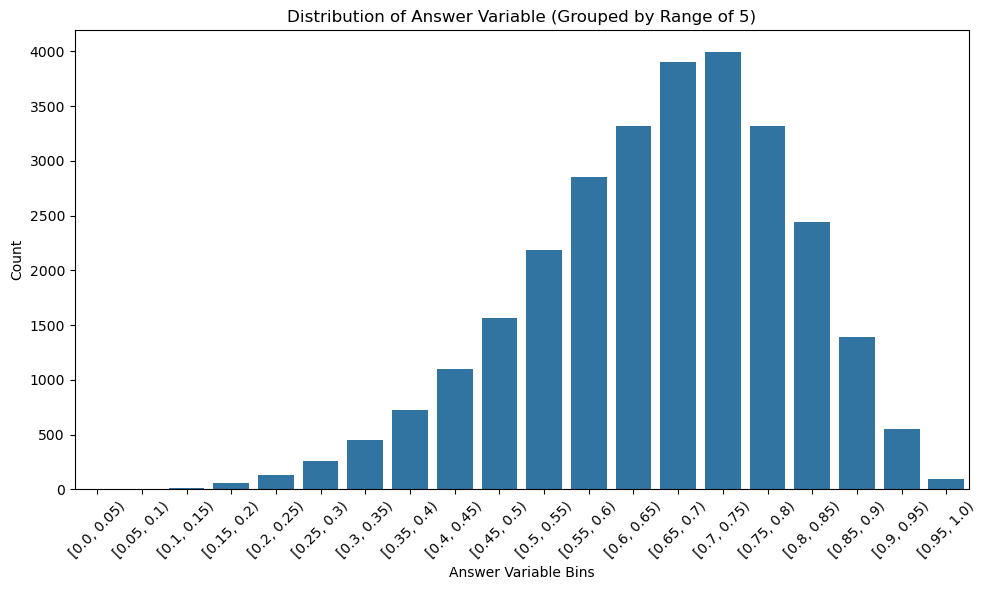

In [225]:
bins = [i / 20.0 for i in range(0, 21)]

# Create a new column 'binned_answer' with the binned data
df["binned_answer"] = pd.cut(df["danceability"], bins=bins, right=False)

# Plot the distribution using countplot to show the counts for each bin
plt.figure(figsize=(10, 6))
sns.countplot(x="binned_answer", data=df)

# Customize the plot
plt.title("Distribution of Answer Variable (Grouped by Range of 5)")
plt.xlabel("Answer Variable Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

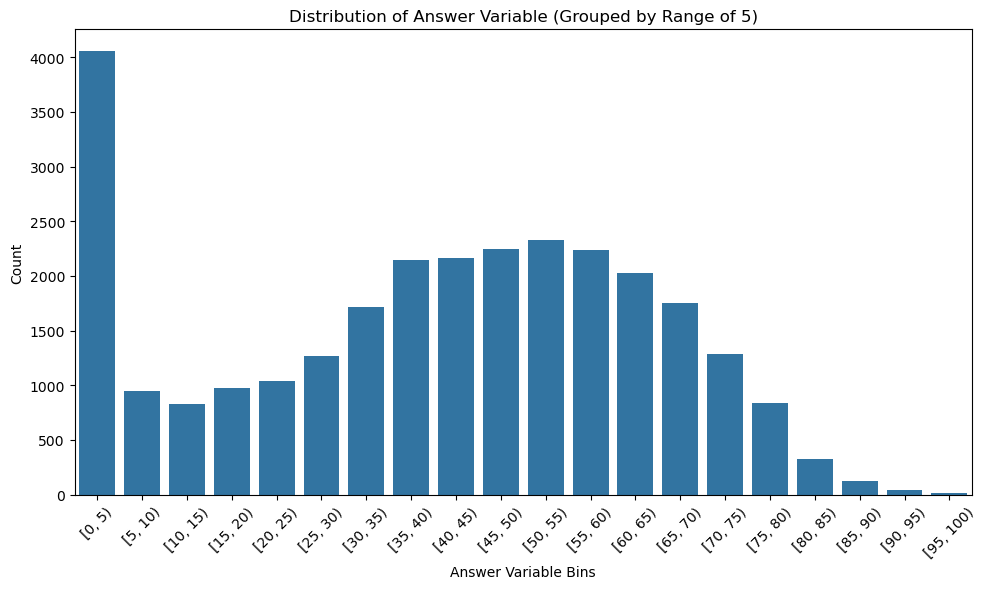

In [226]:
bins = list(range(0, 105, 5))  # Bins from 0 to 100 (inclusive)

# Create a new column 'binned_answer' with the binned data
df["binned_answer"] = pd.cut(df["track_popularity"], bins=bins, right=False)

# Plot the distribution using countplot to show the counts for each bin
plt.figure(figsize=(10, 6))
sns.countplot(x="binned_answer", data=df)

# Customize the plot
plt.title("Distribution of Answer Variable (Grouped by Range of 5)")
plt.xlabel("Answer Variable Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

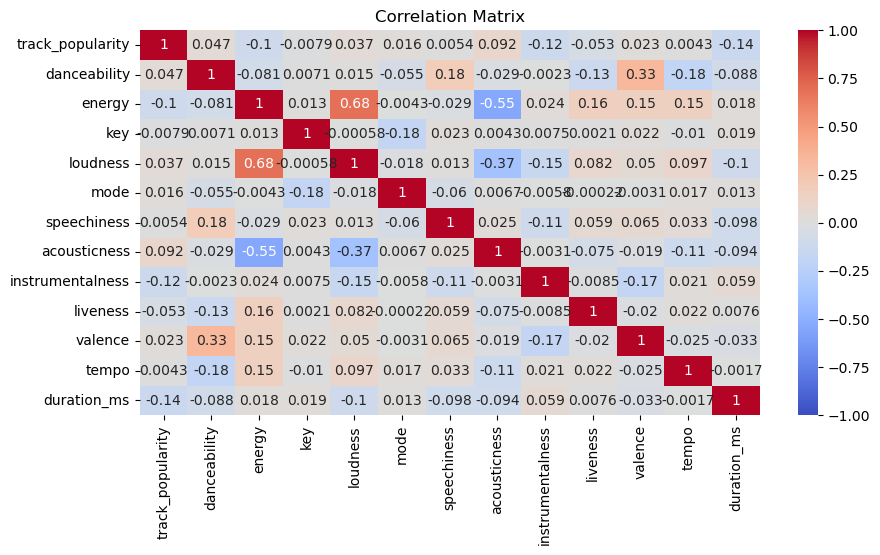

In [227]:
# Calculate the correlation matrix
numeric_df = df.select_dtypes(include=["float64", "int64"])

correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

### Next to do:
- Remove/Transform all non-numerical columns
- One hot encoding
- Target Encoding (Mean Encoding) for artist name

**One hot encoding for playlist_genre or playlist_subgenre?** 

In [228]:
playlist_unique_values = df['playlist_genre'].unique()
playlist_sub_unique_values = df["playlist_subgenre"].unique()

print(f"Genre for playlist_genre: {str(playlist_unique_values)}")
print(f"Genre for playlist_subgenre: {str(playlist_sub_unique_values)}")

Genre for playlist_genre: ['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']
Genre for playlist_subgenre: ['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']


In [229]:
###
df_encoded = pd.get_dummies(df, columns=["playlist_genre"], drop_first=True)

# Display the new DataFrame with one-hot encoded columns
# Display rows 0 to 10 and columns 5 to 10
print(df_encoded.iloc[0:10, 17:23])  # Rows 0 to 10 and columns 5 to 10

    playlist_genre_latin  playlist_genre_pop  playlist_genre_r&b  \
3                  False                True               False   
4                  False                True               False   
6                  False                True               False   
10                 False                True               False   
12                 False                True               False   
13                 False                True               False   
14                 False                True               False   
16                 False                True               False   
19                 False                True               False   
21                 False                True               False   

    playlist_genre_rap  playlist_genre_rock  
3                False                False  
4                False                False  
6                False                False  
10               False                False  
12               Fals

In [230]:
# Step 1: Calculate the mean target value for each 'track_artist'
mean_encoded_artist_track = df.groupby("track_artist")["track_popularity"].mean()

# Step 2: Map the mean target value back to the original DataFrame
df["artist_track_encoded"] = df["track_artist"].map(mean_encoded_artist_track)

# Display the updated DataFrame with the new encoded column
print(df[["track_artist", "artist_track_encoded"]].head())

        track_artist  artist_track_encoded
3   The Chainsmokers             49.227273
4      Lewis Capaldi             76.888889
6         Katy Perry             58.216216
10        Ed Sheeran             65.058824
12       Loud Luxury             58.300000


In [233]:
df["track_album_release_date"] = pd.to_datetime(
    df["track_album_release_date"], errors="coerce"
)

df["release_year"] = df["track_album_release_date"].dt.year

# Extract the month
df["release_month"] = df["track_album_release_date"].dt.month

# Extract the day
df["release_day"] = df["track_album_release_date"].dt.day

**Save pre-processed data in a new csv file**

In [234]:
# Save pre-processed data to a CSV file
df.to_csv(OUTPUT_PATH, index=False)